## "May the all-powerful Lord grant us a restful night and a peaceful death.”

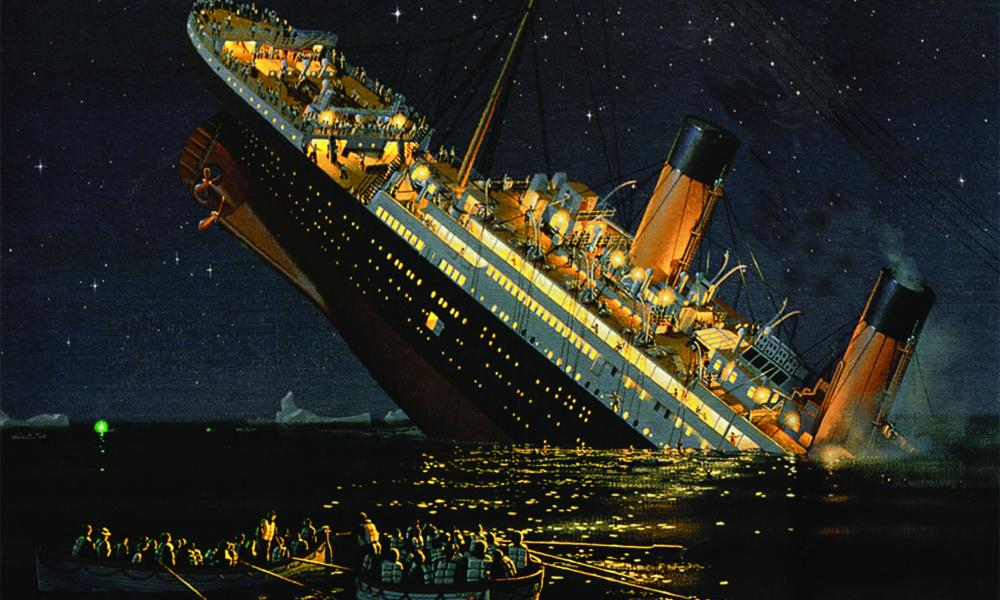

### Importing packages 

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import xgboost as xgb

### Load and display data

In [7]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Quick data summary

In [62]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
train.shape

(891, 12)

In [13]:
test.shape

(418, 11)

In [15]:
train.duplicated().sum()

0

In [16]:
test.duplicated().sum()

0

### Missing values

In [19]:
train.isnull().sum().to_frame()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [20]:
test.isnull().sum().to_frame()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


## Exploratory data analysis 

### Survived

In [28]:
train['Survived'].value_counts(normalize = True).to_frame()

,Survived
0,0.616162
1,0.383838


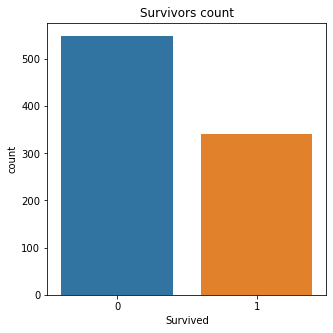

In [32]:
plt.figure(figsize = (5,5))
plt.title("Survivors count")
sns.countplot(x = train['Survived'])

### Sex

In [34]:
train.groupby('Sex').Survived.mean().to_frame()

,Survived
Sex,
female,0.742038
male,0.188908


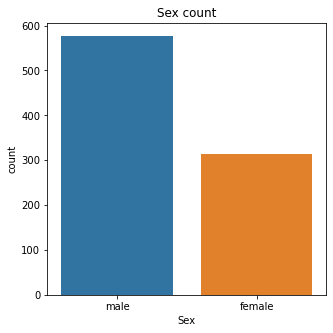

In [36]:
plt.figure(figsize=(5,5))
plt.title("Sex count")
sns.countplot(x = train['Sex'])

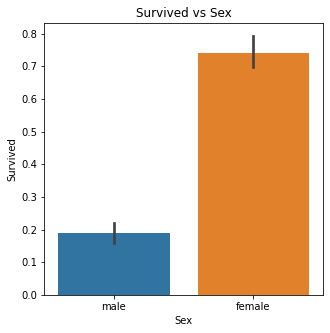

In [38]:
plt.figure(figsize=(5,5))
plt.title('Survived vs Sex')
sns.barplot(x=train['Sex'], y=train['Survived'])

### Pclass

In [41]:
train['Pclass'].value_counts(normalize = True).to_frame()

,Pclass
3,0.551066
1,0.242424
2,0.206510


In [40]:
train.groupby('Pclass').Survived.mean().to_frame()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


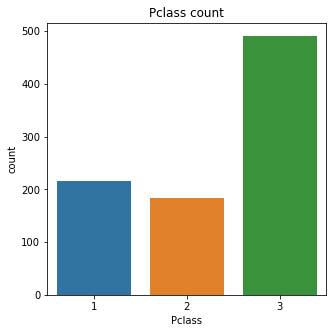

In [61]:
plt.figure(figsize=(5,5))
plt.title('Pclass count')
sns.countplot(x=train['Pclass'])

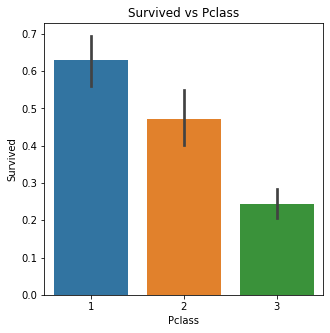

In [39]:
plt.figure(figsize=(5,5))
plt.title('Survived vs Pclass')
sns.barplot(x=train['Pclass'], y=train['Survived'])

### Embarked

In [43]:
train['Embarked'].value_counts(normalize=True).to_frame()

,Embarked
S,0.724409
C,0.188976
Q,0.086614


In [44]:
train.groupby('Embarked').Survived.mean().to_frame()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


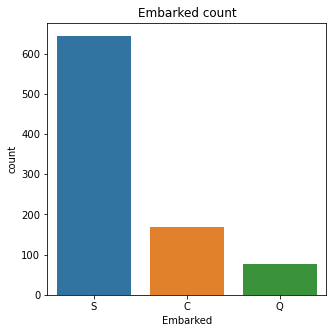

In [60]:
plt.figure(figsize=(5,5))
plt.title('Embarked count')
sns.countplot(x=train['Embarked'])

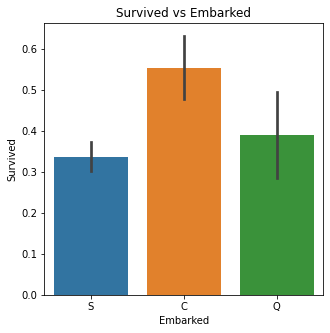

In [49]:
plt.figure(figsize=(5,5))
plt.title('Survived vs Embarked')
sns.barplot(x=train['Embarked'], y=train['Survived'])

### SibSp

In [52]:
train['SibSp'].value_counts(normalize=True).to_frame()

,SibSp
0,0.682379
1,0.234568
2,0.031425
4,0.020202
3,0.017957
8,0.007856
5,0.005612


In [53]:
train.groupby('SibSp').Survived.mean().to_frame()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


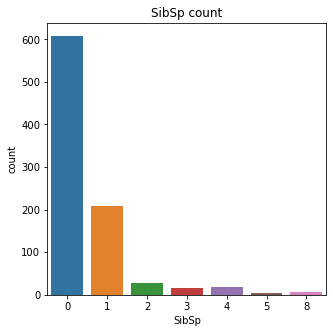

In [59]:
plt.figure(figsize=(5,5))
plt.title('SibSp count')
sns.countplot(x=train['SibSp'])

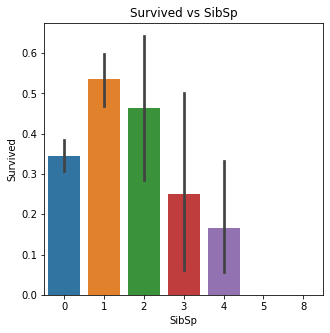

In [51]:
plt.figure(figsize=(5,5))
plt.title('Survived vs SibSp')
sns.barplot(x=train['SibSp'], y=train['Survived'])

### Parch

In [55]:
train['Parch'].value_counts(normalize=True).to_frame()

,Parch
0,0.760943
1,0.132435
2,0.089787
5,0.005612
3,0.005612
4,0.004489
6,0.001122


In [56]:
train.groupby('Parch').Survived.mean().to_frame()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


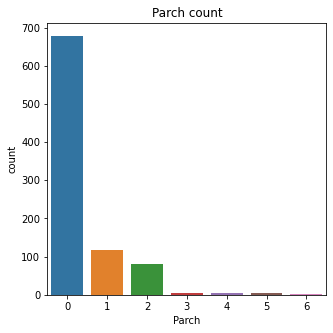

In [58]:
plt.figure(figsize=(5,5))
plt.title('Parch count')
sns.countplot(x=train['Parch'])

### Age

In [72]:
train['Age'].describe().to_frame()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


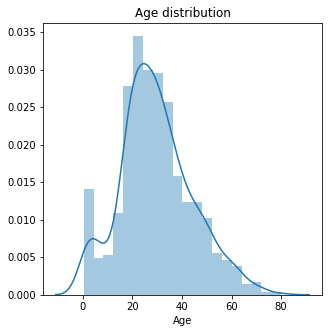

In [66]:
plt.figure(figsize=(5,5))
plt.title('Age distribution')
sns.distplot(train['Age'])

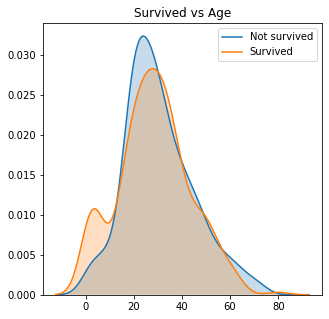

In [70]:
plt.figure(figsize=(5,5))
plt.title('Survived vs Age')
plot = sns.kdeplot(train['Age'].loc[train['Survived'] == 0], shade = True, label = 'Not survived')
plot = sns.kdeplot(train['Age'].loc[train['Survived'] == 1], shade = True, label = 'Survived')

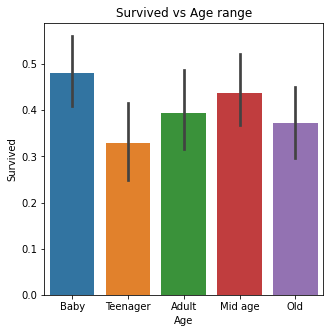

In [80]:
plt.figure(figsize=(5,5))
plt.title('Survived vs Age range')
age_range = pd.qcut(train['Age'], 5, labels=['Baby', 'Teenager', 'Adult', 'Mid age', 'Old'])
sns.barplot(x=age_range, y=train['Survived'])

### Fare

In [73]:
train['Fare'].describe().to_frame()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


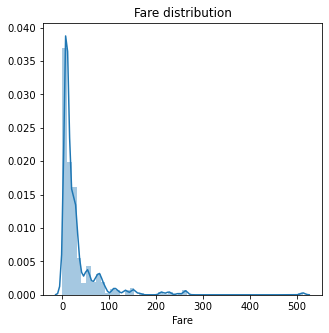

In [74]:
plt.figure(figsize=(5,5))
plt.title('Fare distribution')
sns.distplot(train['Fare'])

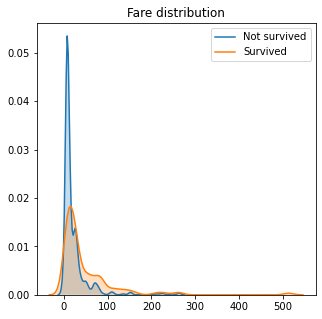

In [77]:
plt.figure(figsize=(5,5))
plt.title('Fare distribution')
plot = sns.kdeplot(train['Fare'].loc[train['Survived'] == 0], shade=True, label='Not survived')
plot = sns.kdeplot(train['Fare'].loc[train['Survived'] == 1], shade=True, label='Survived')

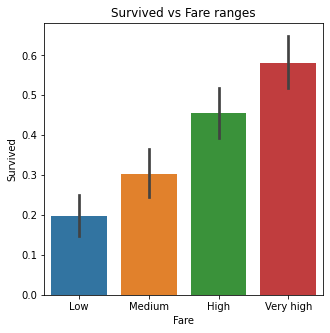

In [79]:
plt.figure(figsize=(5,5))
plt.title('Survived vs Fare ranges')
fare_ranges = pd.qcut(train['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very high'])
sns.barplot(x=fare_ranges, y=train['Survived'])

## Feature engineering

### Name

In [90]:
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['Title'] = test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [92]:
train['Title'].head().to_frame()

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [93]:
train['Title'].value_counts().to_frame()

,Title
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Major,2
Col,2
Mlle,2
Don,1


In [94]:
test['Title'].value_counts().to_frame()

,Title
Mr,240
Miss,78
Mrs,72
Master,21
Col,2
Rev,2
Dona,1
Dr,1
Ms,1


In [95]:
train['Title'].replace(['Lady', 'the Countess', 'Mme', 'Ms', 'Mlle', 'Dona'], 'Miss', inplace=True)
test['Title'].replace(['Lady', 'the Countess', 'Mme', 'Ms', 'Mlle', 'Dona'], 'Miss', inplace=True)
train['Title'].replace(['Major', 'Col', 'Capt', 'Sir', 'Jonkheer', 'Don'], 'Mr', inplace=True)
test['Title'].replace(['Major', 'Col', 'Capt', 'Sir', 'Jonkheer', 'Don'], 'Mr', inplace=True)

In [96]:
train['Title'].value_counts().to_frame()

,Title
Mr,525
Miss,188
Mrs,125
Master,40
Dr,7
Rev,6


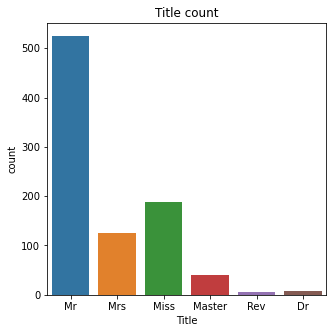

In [97]:
plt.figure(figsize=(5,5))
plt.title('Title count')
sns.countplot(x=train['Title'])

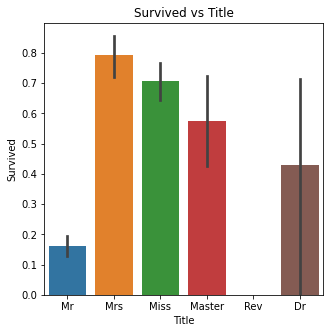

In [98]:
plt.figure(figsize=(5,5))
plt.title('Survived vs Title')
sns.barplot(x=train['Title'], y=train['Survived'])

### Age

In [119]:
train['Age<10'] = pd.cut(train['Age'], [0, 11, 81], labels=['Yes', 'No'])
test['Age<10'] = pd.cut(test['Age'], [0, 11, 81], labels=['Yes', 'No'])

In [120]:
train['Age<10'].value_counts().to_frame()

,Age<10
No,646
Yes,68


In [121]:
train.groupby(train['Age<10']).Survived.mean().to_frame()

,Survived
Age<10,
Yes,0.573529
No,0.388545


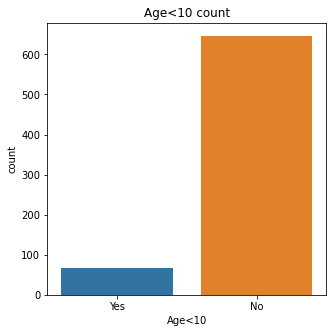

In [122]:
plt.figure(figsize=(5,5))
plt.title('Age<10 count')
sns.countplot(x=train['Age<10'])

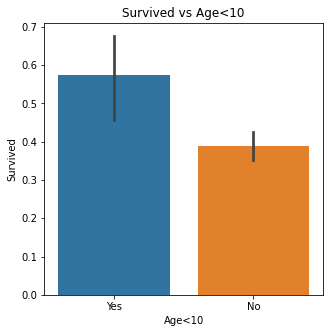

In [123]:
plt.figure(figsize=(5,5))
plt.title('Survived vs Age<10')
sns.barplot(x=train['Age<10'], y=train['Survived'])

### Ticket

In [99]:
train['Ticket_letter'] = train.Ticket.apply(lambda x: x[:2])
test['Ticket_letter'] = test.Ticket.apply(lambda x: x[:2])

In [102]:
train['Ticket_letter'].head().to_frame()

,Ticket_letter
0,A/
1,PC
2,ST
3,11
4,37


In [100]:
train['Ticket_length'] = train.Ticket.apply(lambda x: len(x))
test['Ticket_length'] = test.Ticket.apply(lambda x: len(x))

In [103]:
train['Ticket_length'].head().to_frame()

,Ticket_length
0,9
1,8
2,16
3,6
4,6


### Family Size

In [104]:
train['Family_size'] = train['Parch'] + train['SibSp'] + 1
test['Family_size'] = test['Parch'] + test['SibSp'] + 1

In [105]:
train['Family_size'].value_counts().to_frame()

,Family_size
1,537
2,161
3,102
4,29
6,22
5,15
7,12
11,7
8,6


In [106]:
train.groupby('Family_size').Survived.mean().to_frame()

,Survived
Family_size,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


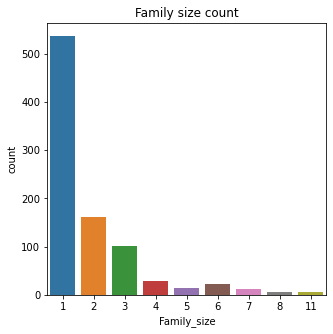

In [109]:
plt.figure(figsize=(5,5))
plt.title('Family size count')
sns.countplot(x=train['Family_size'])

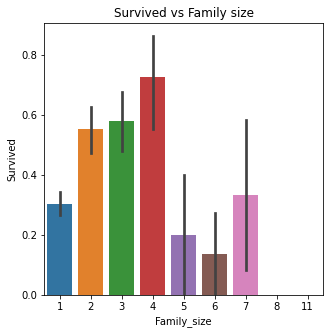

In [108]:
plt.figure(figsize=(5,5))
plt.title('Survived vs Family size')
sns.barplot(x=train['Family_size'], y=train['Survived'])

### Family type

In [110]:
train['Family_type'] = pd.cut(train['Family_size'], [0,1,4,7,11], labels=['Single', 'Small', 'Big', 'Very big'])
test['Family_type'] = pd.cut(test['Family_size'], [0,1,4,7,11], labels=['Single', 'Small', 'Big', 'Very big'])

In [111]:
train['Family_type'].value_counts().to_frame()

,Family_type
Single,537
Small,292
Big,49
Very big,13


In [112]:
test['Family_type'].value_counts().to_frame()

,Family_type
Single,253
Small,145
Big,14
Very big,6


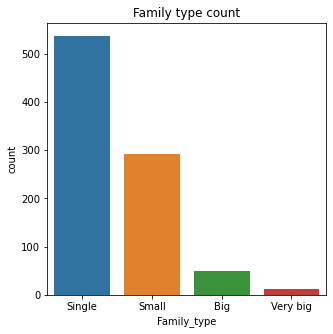

In [113]:
plt.figure(figsize=(5,5))
plt.title('Family type count')
sns.countplot(x=train['Family_type'])

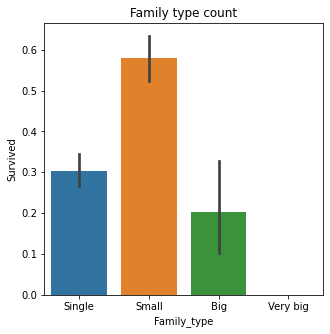

In [114]:
plt.figure(figsize=(5,5))
plt.title('Family type count')
sns.barplot(x=train['Family_type'], y=train['Survived'])

## Classification modelling

### X, y variables

In [130]:
x_features = ['Sex', 'Age<10', 'Pclass', 'Family_type', 'Fare', 'Title', 'Ticket_letter', 'Ticket_length']
X = train[x_features]
y = train['Survived']

In [131]:
X.head()

,Sex,Age<10,Pclass,Family_type,Fare,Title,Ticket_letter,Ticket_length
0,male,No,3,Small,7.2500,Mr,A/,9
1,female,No,1,Small,71.2833,Mrs,PC,8
2,female,No,3,Single,7.9250,Miss,ST,16
3,female,No,1,Small,53.1000,Mrs,11,6
4,male,No,3,Single,8.0500,Mr,37,6


In [132]:
y.head().to_frame()

,Survived
0,0
1,1
2,1
3,1
4,0


### Transformation and Preprocessing

In [133]:
numerical_columns = ['Fare']
categorical_columns = ['Sex', 'Age<10', 'Pclass', 'Family_type', 'Title', 'Ticket_letter', 'Ticket_length']

In [134]:
numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('oneHot', OneHotEncoder(handle_unknown='ignore'))
])

In [141]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])

## Classification models

### 1. Logistic regression

In [165]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

In [166]:
pipeline.fit(X,y)

C:\Users\Alchemist\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Age<10', 'Pclass',
                                                   'Family_type', 'Title',
                                                   'Ticket_letter',
                                                   'Ticket_length'])])),
                ('model', LogisticRegres

In [145]:
print('Score: {:.3f}'.format(cross_val_score(pipeline, X, y, cv=10).mean()))

C:\Users\Alchemist\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Alchemist\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

Score: 0.829


C:\Users\Alchemist\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2. Decision tree classifier

In [146]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier())
])

In [147]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Age<10', 'Pclass',
                                                   'Family_type', 'Title',
                                                   'Ticket_letter',
                                                   'Ticket_length'])])),
                ('model', DecisionTreeCl

In [149]:
print('Score: {:.3f}'.format(cross_val_score(pipeline, X, y, cv=10).mean()))

Score: 0.796


### 3. Naive bayes classifier

In [150]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', MultinomialNB())
])

In [151]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Age<10', 'Pclass',
                                                   'Family_type', 'Title',
                                                   'Ticket_letter',
                                                   'Ticket_length'])])),
                ('model', MultinomialNB(

In [152]:
print('Score: {:.3f}'.format(cross_val_score(pipeline,X,y, cv=10).mean()))

Score: 0.751


### 4. Random forest classifier

In [182]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=0, n_estimators=1000, max_depth=5))
])

In [183]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Age<10', 'Pclass',
                                                   'Family_type', 'Title',
                                                   'Ticket_letter',
                                                   'Ticket_length'])])),
                ('model',
              

In [184]:
print('Score: {:.3f}'.format(cross_val_score(pipeline, X, y, cv=10).mean()))

Score: 0.825


### 5. XGBoost classifier

In [174]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb.XGBClassifier())
])

In [177]:
param_grid = {
    'model__max_depth': [2, 3, 5, 7, 10],
    'model__n_estimators': [10, 100, 500],
}
grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

In [178]:
grid.fit(X, y)

C:\Users\Alchemist\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:42:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('oneHot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex',
                           

In [179]:
print('Score: {:.3f}'.format(cross_val_score(pipeline, X, y, cv=10).mean()))

C:\Users\Alchemist\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:43:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Alchemist\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:43:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Alchemist\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:43:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Alchemist\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:43:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Alchemist\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:43:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Alchemist\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:43:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Alchemist\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:43:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Alchemist\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:43:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Alchemist\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:43:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Alchemist\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:43:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score: 0.825


## Prediction

In [156]:
X_test = test[x_features]
X_test.head()

,Sex,Age<10,Pclass,Family_type,Fare,Title,Ticket_letter,Ticket_length
0,male,No,3,Single,7.8292,Mr,33,6
1,female,No,3,Small,7.0000,Mrs,36,6
2,male,No,2,Single,9.6875,Mr,24,6
3,male,No,3,Single,8.6625,Mr,31,6
4,female,No,3,Small,12.2875,Mrs,31,7


In [185]:
prediction = pipeline.predict(X_test)

## Submission

In [186]:
result = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':prediction})
result.to_csv('mySubmission12.csv', index=False)